<a href="https://colab.research.google.com/github/coderunner86/talento_tech/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
mnist = keras.datasets.mnist
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

label: 0

 Image: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 

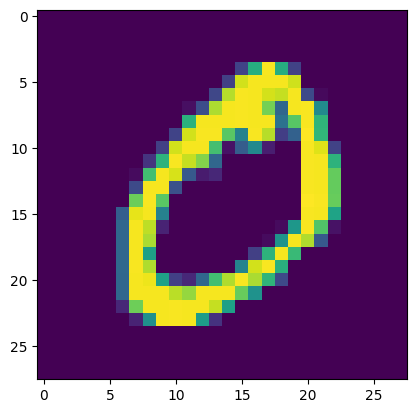

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
index = 1
np.set_printoptions(linewidth=320)
print(f'label: {train_lbl[index]}')
print(f'\n Image: {train_img[index]}')
plt.imshow(train_img[index])

In [ ]:
train_img_n = train_img / 255.0
test_img_n = test_img /255.0

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(train_img_n, train_lbl, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2581 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1112 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0768 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0583 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0439 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0353 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.016

<Axes: >

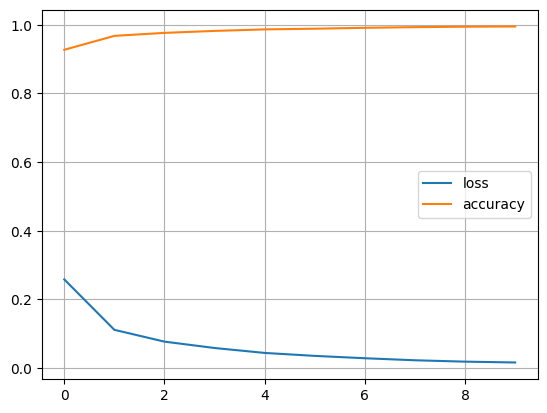

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot(grid=True)

In [ ]:
loss, accuracy = model.evaluate(train_img_n, train_lbl)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precicion en el conjunto de entrenamiento", accuracy)


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0108 - accuracy: 0.9968
Pérdida en el conjunto de entrenamiento: 0.010812745429575443
Precicion en el conjunto de entrenamiento 0.996833324432373


In [ ]:
loss, accuracy = model.evaluate(test_img_n, test_lbl)
print("Pérdida en el conjunto de prueba:", loss)
print("Precicion en el conjunto de prueba", accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0789 - accuracy: 0.9781
Pérdida en el conjunto de prueba: 0.07894960045814514
Precicion en el conjunto de prueba 0.9781000018119812


In [ ]:
predictions = model.predict(test_img_n)
predicted_lbl = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_lbl, predicted_lbl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

<Figure size 1000x1000 with 0 Axes>

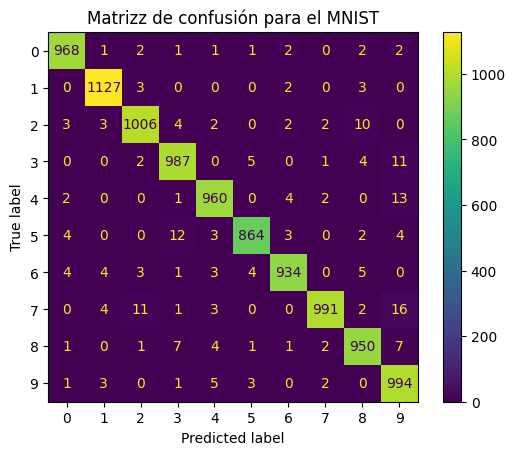

In [ ]:
plt.figure(figsize=(10, 10))
disp.plot(cmap='viridis', values_format='d')
plt.title('Matrizz de confusión para el MNIST')
plt.show()